https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/stress/stress-measures-and-stress-invariants/

5.2.4

In [1]:
from sympy import Matrix,simplify,diff,solve
import sympy as sp
s1,s2,t = sp.symbols("sigma_1 sigma_2 theta")
ss = Matrix([[s1,0],[0,s2]])
display("\u03C3 =",ss)
Q = Matrix([[sp.cos(t), -sp.sin(t)], 
            [sp.sin(t), sp.cos(t)]])
display("Q =",Q)
news = simplify(Q*ss*Q.T)
display("Stress Matrix")
display("\u03C3' =",news)
eq1 = diff(news[0,1],t)
display("Max value of \u03C3'_12 =",eq1)
s = solve(eq1,t)
display("\u03B8 =",s,"degrees: ",[i*180/sp.pi for i in s])

'σ ='

Matrix([
[sigma_1,       0],
[      0, sigma_2]])

'Q ='

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

'Stress Matrix'

"σ' ="

Matrix([
[sigma_1*cos(theta)**2 + sigma_2*sin(theta)**2,            (sigma_1 - sigma_2)*sin(2*theta)/2],
[           (sigma_1 - sigma_2)*sin(2*theta)/2, sigma_1*sin(theta)**2 + sigma_2*cos(theta)**2]])

"Max value of σ'_12 ="

2*(sigma_1/2 - sigma_2/2)*cos(2*theta)

'θ ='

[pi/4, 3*pi/4]

'degrees: '

[45, 135]

https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/stress/first-and-second-piola-kirchhoff-stress-tensors/#example2

5.5.1

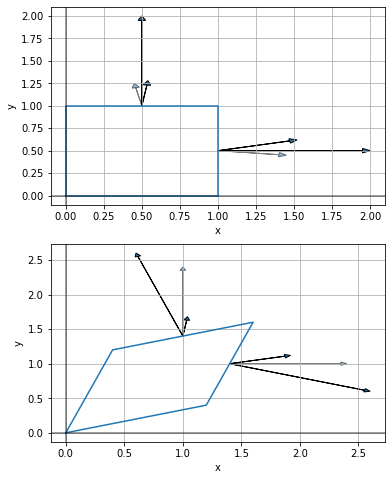

In [4]:
from sympy import Matrix
import sympy as sp
from matplotlib import pyplot as plt
F = Matrix([[1.2,0.4],[0.4,1.2]])
coordinates=[[0,0],[0,1],[1,1],[1,0],[0,0]]
newcoordinates=[F*Matrix(coordinates[i]) for i in range(len(coordinates))]
bx =[Matrix(coordinates)[:,0], Matrix(coordinates)[:,1]]
bx2 = [[newcoordinates[i][0] for i in range(5)],[newcoordinates[i][1] for i in range(5)]]
Sigma = Matrix([[5,2],[2,3]])
N1 = Matrix([1,0])
N2 = Matrix([0,1])
Farea = F.det()*F.T.inv()
an1 = Farea*N1
an2 = Farea*N2
tn1 = Sigma.T*an1
tn2 = Sigma.T*an2
FirstPiola = Sigma.T*F.T.inv()*F.det()
SecondPiola = F.inv()*FirstPiola
TN1 = FirstPiola*N1
TN2 = FirstPiola*N2
STN1 = SecondPiola*N1
STN2 = SecondPiola*N2
Pt11 = F*N1+1/2*F*N2
Pt12 = Pt11+an1
Pt21 = 1/2*F*N1+F*N2
Pt22 = Pt21+an2
ar1 = Matrix([Pt11,Pt12]).reshape(2,2)
ar2 = Matrix([[Pt21],[Pt22]]).reshape(2,2)
A1dotted = Matrix([Pt11,Pt11+Matrix([1,0])]).reshape(2,2)
A2dotted = Matrix([Pt21,Pt21+Matrix([0,1])]).reshape(2,2)
A1 = Matrix([[1,0.5],[2,0.5]])
A2 = Matrix([[0.5,1],[0.5,2]])
artn1 = Matrix([Pt11,Pt11+tn1/10]).reshape(2,2)
artn2 = Matrix([Pt21,Pt21+tn2/10]).reshape(2,2)
arTN1 = Matrix([Matrix([1,0.5]),Matrix([1,0.5])+TN1/10]).reshape(2,2)
arTN2 = Matrix([Matrix([0.5,1]),Matrix([0.5,1])+TN2/10]).reshape(2,2)
arSTN1 = Matrix([Matrix([1,0.5]),Matrix([1,0.5])+STN1/10]).reshape(2,2)
arSTN2 = Matrix([Matrix([0.5,1]),Matrix([0.5,1])+STN2/10]).reshape(2,2)
fig, ax = plt.subplots(2, figsize=(6,8))
def plotArrow(p,M,t):
    x,y,dx,dy = M[0,0],M[0,1],float(M[1,0]-M[0,0]),float(M[1,1]-M[0,1])
    p.arrow(x,y,dx,dy,length_includes_head = True,head_width=.05, head_length=.05,alpha=t)
plotArrow(ax[0],A1,1)
plotArrow(ax[0],A2,1)
plotArrow(ax[0],arTN1,1)
plotArrow(ax[0],arTN2,1)
plotArrow(ax[0],arSTN1,.5)
plotArrow(ax[0],arSTN2,.5)
#rectangle coordinates
ax[0].plot(bx[0][:],bx[1][:])
ax[1].plot(bx2[0][:],bx2[1][:])
plotArrow(ax[1],ar1,1)
plotArrow(ax[1],ar2,1)
plotArrow(ax[1],artn1,1)
plotArrow(ax[1],artn2,1)
plotArrow(ax[1],A1dotted,.5)
plotArrow(ax[1],A2dotted,.5)
for i in ax:
    i.grid(True, which='both')
    i.axhline(y = 0, color = 'k',alpha = 0.5)
    i.axvline(x = 0, color = 'k',alpha = 0.5)
    i.set_xlabel("x")
    i.set_ylabel("y")

5.6.1

In [5]:
from sympy import Matrix
import sympy as sp
sp.init_printing(use_latex="mathjax")
s = Matrix([[1,-1,0],[-1,-5,0],[0,0,4]])
display("\u03C3 =",s)
u = Matrix([1,1,1])
display("u = ",u)
n = u/u.norm()
display("n = ",n)
t = s*n
display("traction vector = \u03C3n =",t)
n_stress = t.dot(n)
display("normal stress =", n_stress)
shear_stress = t - n_stress*n
display("shear stress vector on n =",shear_stress)
display("\u03C4_n =", shear_stress.norm())
eigensystem = s.eigenvects()
display("eigensystem", eigensystem)
eigenvalues = [i[0] for i in eigensystem]
eigenvectors = [i[2][0].T for i in eigensystem]
neigenvectors = [(i/i.norm()).evalf() for i in eigenvectors]
display("eigenvalues (principal Stresses) =",eigenvalues)
display("eigenvectors (principal directions) =",eigenvectors)
display("Normalized eigenvectors (principal directions) =",neigenvectors)
Q = Matrix(neigenvectors)
# rearrange 
Q = Matrix([Q[2,:],Q[1,:],Q[0,:]])
display("Q =",Q.evalf(3))
sp = Q*s*Q.T
display("\u03C3' = Q*\u03C3*Q^T =",sp.evalf(3))

'σ ='

⎡1   -1  0⎤
⎢         ⎥
⎢-1  -5  0⎥
⎢         ⎥
⎣0   0   4⎦

'u = '

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

'n = '

⎡√3⎤
⎢──⎥
⎢3 ⎥
⎢  ⎥
⎢√3⎥
⎢──⎥
⎢3 ⎥
⎢  ⎥
⎢√3⎥
⎢──⎥
⎣3 ⎦

'traction vector = σn ='

⎡  0  ⎤
⎢     ⎥
⎢-2⋅√3⎥
⎢     ⎥
⎢4⋅√3 ⎥
⎢──── ⎥
⎣ 3   ⎦

'normal stress ='

-2/3

'shear stress vector on n ='

⎡ 2⋅√3  ⎤
⎢ ────  ⎥
⎢  9    ⎥
⎢       ⎥
⎢-16⋅√3 ⎥
⎢───────⎥
⎢   9   ⎥
⎢       ⎥
⎢ 14⋅√3 ⎥
⎢ ───── ⎥
⎣   9   ⎦

'τ_n ='

2⋅√38
─────
  3  

'eigensystem'

⎡               ⎛             ⎡⎡   1   ⎤⎤⎞  ⎛             ⎡⎡   1   ⎤⎤⎞⎤
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜             ⎢⎢───────⎥⎥⎟  ⎜             ⎢⎢───────⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢3 - √10⎥⎥⎟  ⎜             ⎢⎢3 + √10⎥⎥⎟⎥
⎢⎜4, 1, ⎢⎢0⎥⎥⎟, ⎜-2 + √10, 1, ⎢⎢       ⎥⎥⎟, ⎜-√10 - 2, 1, ⎢⎢       ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢   1   ⎥⎥⎟  ⎜             ⎢⎢   1   ⎥⎥⎟⎥
⎢⎝      ⎣⎣1⎦⎦⎠  ⎜             ⎢⎢       ⎥⎥⎟  ⎜             ⎢⎢       ⎥⎥⎟⎥
⎣               ⎝             ⎣⎣   0   ⎦⎦⎠  ⎝             ⎣⎣   0   ⎦⎦⎠⎦

'eigenvalues (principal Stresses) ='

[4, -2 + √10, -√10 - 2]

'eigenvectors (principal directions) ='

⎡           ⎡   1         ⎤  ⎡   1         ⎤⎤
⎢[0  0  1], ⎢───────  1  0⎥, ⎢───────  1  0⎥⎥
⎣           ⎣3 - √10      ⎦  ⎣3 + √10      ⎦⎦

'Normalized eigenvectors (principal directions) ='

[[0  0  1.0], [-0.987087457637497  0.160182243006967  0], [0.160182243006967  
0.987087457637497  0]]

'Q ='

⎡ 0.16   0.987   0 ⎤
⎢                  ⎥
⎢-0.987  0.16    0 ⎥
⎢                  ⎥
⎣  0       0    1.0⎦

"σ' = Q*σ*Q^T ="

⎡  -5.16    -1.11e-16   0 ⎤
⎢                         ⎥
⎢-8.33e-17    1.16      0 ⎥
⎢                         ⎥
⎣    0          0      4.0⎦

5.6.2

In [6]:
from sympy import Matrix, N
import sympy as sp
sp.init_printing(use_latex="mathjax")
s = Matrix([[2,2,0],[2,5,0],[0,0,-5]])
display("\u03C3 =",s)
eigensystem = s.eigenvects()
display("eigensystem", eigensystem)
eigenvalues = [i[0] for i in eigensystem]
eigenvectors = [i[2][0].T for i in eigensystem]
neigenvectors = [(i/i.norm()).evalf() for i in eigenvectors]
display("eigenvalues (principal Stresses) =",eigenvalues)
display("eigenvectors (principal directions) =",eigenvectors)
display("Normalized eigenvectors (principal directions) =",neigenvectors)
Q = Matrix(neigenvectors)
# rearrange 
Q = Matrix([Q[1,:],Q[0,:],Q[2,:]])
display("Q =",Q.evalf(3))
sp = N(Q*s*Q.T,chop=True)
display("\u03C3' =",sp)

'σ ='

⎡2  2  0 ⎤
⎢        ⎥
⎢2  5  0 ⎥
⎢        ⎥
⎣0  0  -5⎦

'eigensystem'

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡-2⎤⎤⎞  ⎛      ⎡⎡1/2⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎢⎜-5, 1, ⎢⎢0⎥⎥⎟, ⎜1, 1, ⎢⎢1 ⎥⎥⎟, ⎜6, 1, ⎢⎢ 1 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0 ⎦⎦⎠  ⎝      ⎣⎣ 0 ⎦⎦⎠⎦

'eigenvalues (principal Stresses) ='

[-5, 1, 6]

'eigenvectors (principal directions) ='

[[0  0  1], [-2  1  0], [1/2  1  0]]

'Normalized eigenvectors (principal directions) ='

[[0  0  1.0], [-0.894427190999916  0.447213595499958  0], [0.447213595499958  
0.894427190999916  0]]

'Q ='

⎡-0.894  0.447   0 ⎤
⎢                  ⎥
⎢  0       0    1.0⎥
⎢                  ⎥
⎣0.447   0.894   0 ⎦

"σ' ="

⎡1.0   0    1.66533453693773e-16⎤
⎢                               ⎥
⎢ 0   -5.0           0          ⎥
⎢                               ⎥
⎣ 0    0            6.0         ⎦

5.6.3

In [7]:
from sympy import Matrix
import sympy as sp
sp.init_printing(use_latex="mathjax")
s1 = Matrix([[2,2,0],[2,5,0],[0,0,-5]])
s2 = Matrix([[2,2,1],[2,4,-3],[1,-3,7]])
# vonMises function
def vonMises(M):
    return sp.sqrt(1/2*((M[0,0] - M[1,1])**2+(M[1,1] - M[2,2])**2+
                       (M[2,2] - M[0,0])**2+6*(M[0,1]**2+M[0,2]**2+M[1,2]**2)))
# example of a rotation matrix
t = sp.symbols("\u03B8")
Qx = Matrix([[1, 0, 0], 
            [0, sp.cos(t), -sp.sin(t)], 
            [0, sp.sin(t), sp.cos(t)]])
Qx = Qx.subs({t:30*sp.pi/180})
# outputs
display("s_1 =",s1)
display("Von Mises =",vonMises(s1))
display(vonMises(Qx*s1*Qx.T))
display("s_2 =",s2)
display("Von Mises =",vonMises(s2))
display(vonMises(Qx*s2*Qx.T).evalf())

's_1 ='

⎡2  2  0 ⎤
⎢        ⎥
⎢2  5  0 ⎥
⎢        ⎥
⎣0  0  -5⎦

'Von Mises ='

9.53939201416946

9.53939201416946

's_2 ='

⎡2  2   1 ⎤
⎢         ⎥
⎢2  4   -3⎥
⎢         ⎥
⎣1  -3  7 ⎦

'Von Mises ='

7.81024967590665

7.81024967590665

5.6.4

In [9]:
from sympy import Matrix,N
import sympy as sp
sp.init_printing(use_latex="mathjax")
s1 = Matrix([[25,40,0],[40,20,30],[0,30,20]])
eVals = Matrix([i[0] for i in s1.eigenvects()]).evalf()
#Added chop=True to remove the small numbers.
display("eigenvalues (principal Stresses) =",N(eVals,chop=True))
e1, e2, e3 = eVals
maxShearStress = max([abs(e1-e2),abs(e2-e3),abs(e2-e3)])/2
display("max shear stress =",maxShearStress)
MisesStress = sp.sqrt((abs(e1-e2)**2+abs(e1-e3)**2+abs(e2-e3)**2)/2)
display("Von Mises stress =",MisesStress.evalf())

'eigenvalues (principal Stresses) ='

⎡21.7958664928811 ⎤
⎢                 ⎥
⎢71.6852057714666 ⎥
⎢                 ⎥
⎣-28.4810722643477⎦

'max shear stress ='

50.0831390179071

'Von Mises stress ='

86.7467578644874

5.6.5

In [10]:
from sympy import Matrix
import sympy as sp
sp.init_printing(use_latex="mathjax")
display("Units are in MPa")
P = 3
d = 2000
t = 10
r = d/2
def vonMises(M):
    return sp.sqrt(1/2*((M[0,0] - M[1,1])**2+(M[1,1] - M[2,2])**2+
                       (M[2,2] - M[0,0])**2+6*(M[0,1]**2+M[0,2]**2+M[1,2]**2)))
s_11 = (P*sp.pi*r**2)/(2*sp.pi*r*t)
display("\u03C3_11 =",s_11)
s_22 = P*r/t
display("\u03C3_22 =",s_22)
s = Matrix([[s_11,0,0],[0,s_22,0],[0,0,0]])
display("\u03C3 =",s)
display("Von Mises =",vonMises(s))

'Units are in MPa'

'σ_11 ='

150.000000000000

'σ_22 ='

300.0

'σ ='

⎡150.0    0    0⎤
⎢               ⎥
⎢  0    300.0  0⎥
⎢               ⎥
⎣  0      0    0⎦

'Von Mises ='

259.807621135332

5.6.6

In [11]:
import sympy as sp
sp.init_printing(use_latex="mathjax")
e1, e2, e3 = -500, -100, -500
maxShearStress = max([abs(e1-e2),abs(e2-e3),abs(e2-e3)])/2
display("max shear stress (MPa) =",maxShearStress)

'max shear stress (MPa) ='

200.0